In [ ]:
import pandas as pd
import numpy as np
import librosa
from pathlib import Path
from tqdm import tqdm
import matplotlib.pyplot as plt

#chargement

In [ ]:
import os
import tarfile
from tqdm import tqdm

# Créer le dossier de destination
output_dir = "/content/train-clean-100"
os.makedirs(output_dir, exist_ok=True)

# Téléchargement avec barre de progression
!wget -q -c https://www.openslr.org/resources/12/train-clean-100.tar.gz -O - | tar -xz -C {output_dir} --strip-components=1

# Vérification
print("\nContenu du dossier (premiers éléments):")
!ls -lh {output_dir} | head -n 10
print(f"\nNombre total de dossiers speakers: {len(os.listdir(output_dir))}")


Contenu du dossier (premiers éléments):
total 912K
-rw-r--r--   1 1000 1000 114K Oct  3  2014 BOOKS.TXT
-rw-r--r--   1 1000 1000 656K Aug 17  2014 CHAPTERS.TXT
-rw-r--r--   1 1000 1000  193 Aug 17  2014 LICENSE.TXT
-rw-r--r--   1 1000 1000 7.9K Oct  3  2014 README.TXT
-rw-r--r--   1 1000 1000 123K Aug 17  2014 SPEAKERS.TXT
drwxr-xr-x 253 1000 1000 4.0K Aug 16  2014 train-clean-100

Nombre total de dossiers speakers: 6


In [ ]:
import os
from pathlib import Path

# 1. Vérification du chemin
dataset_path = "/content/train-clean-100"
print(f"Vérification du dossier: {dataset_path}")

if not os.path.exists(dataset_path):
    print("❌ Le dossier n'existe pas")
    # Solution alternative pour créer la structure
    !mkdir -p {dataset_path}
    print(f"Dossier créé: {dataset_path}")
else:
    print("✅ Dossier trouvé")

# 2. Analyse approfondie du contenu
print("\nAnalyse du contenu:")
all_items = list(Path(dataset_path).rglob("*"))

if not all_items:
    print("Le dossier est vide")
else:
    # Afficher la structure
    print(f"Nombre total d'éléments: {len(all_items)}")
    print("\nStructure des dossiers (5 premiers éléments):")
    for item in all_items[:5]:
        print(f"- {item.relative_to(dataset_path)}")

    # Trouver les fichiers audio
    flac_files = list(Path(dataset_path).rglob("*.flac"))

    if flac_files:
        print(f"\n✅ {len(flac_files)} fichiers FLAC trouvés")
        first_audio = flac_files[0]
        print(f"Premier fichier audio: {first_audio}")

        # Lecture du fichier audio
        import soundfile as sf
        audio, sr = sf.read(first_audio)
        print(f"Durée: {len(audio)/sr:.2f} secondes | Taux d'échantillonnage: {sr} Hz")
    else:
        print("\n❌ Aucun fichier FLAC trouvé. Causes possibles:")
        print("1. Le téléchargement a échoué")
        print("2. Les fichiers sont dans un sous-dossier")
        print("3. Le dataset utilise un format différent (ex: .wav)")

        # Solution automatique
        print("\nTentative de recherche dans les sous-dossiers...")
        all_flac = list(Path("/content").rglob("*.flac"))
        if all_flac:
            print(f"Fichiers trouvés ailleurs: {len(all_flac)}")
            print("Exemple:", all_flac[0])
        else:
            print("Aucun fichier audio trouvé dans /content")

Vérification du dossier: /content/train-clean-100
✅ Dossier trouvé

Analyse du contenu:
Nombre total d'éléments: 29966

Structure des dossiers (5 premiers éléments):
- train-clean-100
- README.TXT
- SPEAKERS.TXT
- CHAPTERS.TXT
- LICENSE.TXT

✅ 28539 fichiers FLAC trouvés
Premier fichier audio: /content/train-clean-100/train-clean-100/4362/15663/4362-15663-0106.flac
Durée: 13.17 secondes | Taux d'échantillonnage: 16000 Hz


In [ ]:
from pathlib import Path
import pandas as pd
import librosa

# Version optimisée pour traiter TOUS les fichiers
audio_files = list(Path("/content/train-clean-100").rglob("*.flac"))

# Création du DataFrame complet avec barre de progression
df = pd.DataFrame([{
    "path": str(f),
    "speaker_id": f.parent.parent.name,
    "chapter_id": f.parent.name,
    "duration": float(librosa.get_duration(filename=str(f)))
} for f in tqdm(audio_files, desc="Processing files")])  # Suppression de [:1000]

# Vérification
print(f"Nombre total de fichiers traités: {len(df)}")
print("\nAperçu du DataFrame :")
print(df.head())

Processing files:   0%|          | 0/28539 [00:00<?, ?it/s]<ipython-input-3-f6c253483fd1>:13: FutureWarning: get_duration() keyword argument 'filename' has been renamed to 'path' in version 0.10.0.
	This alias will be removed in version 1.0.
  "duration": float(librosa.get_duration(filename=str(f)))
Processing files: 100%|██████████| 28539/28539 [11:19<00:00, 41.98it/s]

Nombre total de fichiers traités: 28539

Aperçu du DataFrame :
                                                path speaker_id chapter_id  \
0  /content/train-clean-100/train-clean-100/4362/...       4362      15663   
1  /content/train-clean-100/train-clean-100/4362/...       4362      15663   
2  /content/train-clean-100/train-clean-100/4362/...       4362      15663   
3  /content/train-clean-100/train-clean-100/4362/...       4362      15663   
4  /content/train-clean-100/train-clean-100/4362/...       4362      15663   

   duration  
0    13.170  
1    12.710  
2    14.835  
3    14.385  
4    13.900  


#Prétraitement

In [ ]:
# Fonction pour détecter et supprimer les silences
def remove_silence(audio, top_db=25):
    # Utiliser librosa.effects.trim pour couper les silences
    trimmed_audio, _ = librosa.effects.trim(audio, top_db=top_db)
    return trimmed_audio

In [ ]:
import IPython.display as ipd

# Sélectionner un fichier au hasard ou par index
sample_audio = df.sample(1)["path"].values[0]

# Jouer l'audio
ipd.Audio(sample_audio)

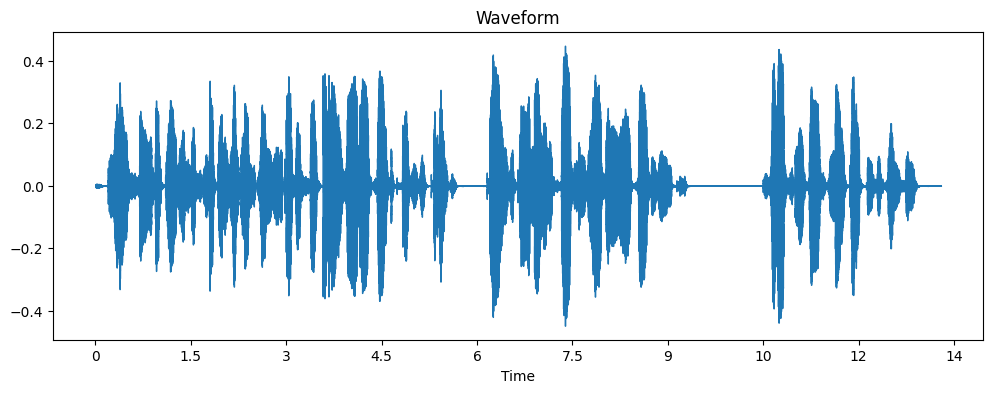

In [ ]:
import matplotlib.pyplot as plt
import librosa.display

# Charger un fichier audio
y, sr = librosa.load(sample_audio)

# Afficher la waveform
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform")
plt.show()

In [ ]:
import numpy as np

<ipython-input-11-8a769c045614>:2: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)


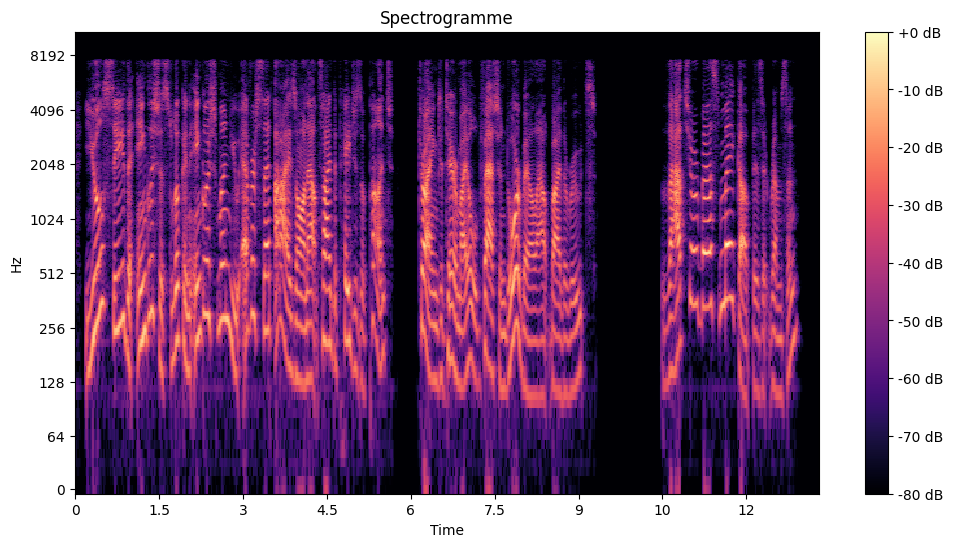

In [ ]:
# Calculer et afficher un spectrogramme
D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)
plt.figure(figsize=(12, 6))
librosa.display.specshow(D, sr=sr, x_axis="time", y_axis="log")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogramme")
plt.show()

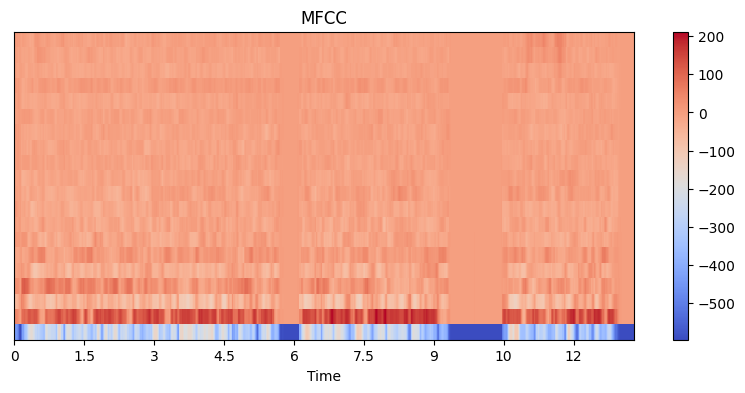

In [ ]:
# Exemple: Extraire MFCCs
mfccs = librosa.feature.mfcc(y=y, sr=sr)
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis="time")
plt.colorbar()
plt.title("MFCC")
plt.show()

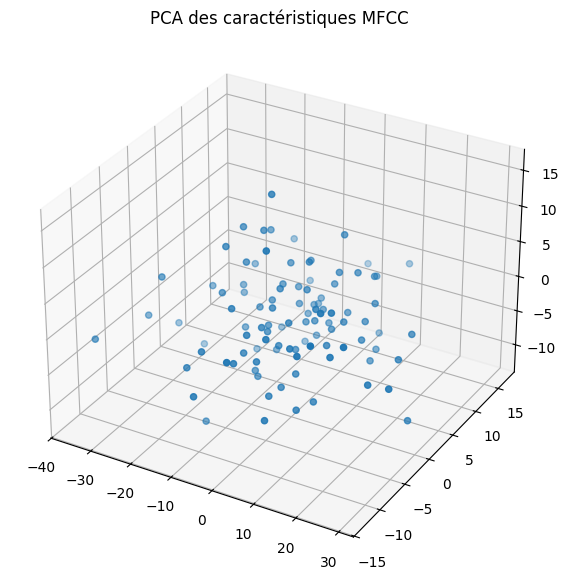

In [ ]:
from sklearn.decomposition import PCA

# Exemple avec MFCCs moyens
mfcc_means = [librosa.feature.mfcc(y=librosa.load(str(p))[0]).mean(axis=1) for p in df["path"][:100]]  # Limité pour la performance
pca = PCA(n_components=3)
mfcc_3d = pca.fit_transform(mfcc_means)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(mfcc_3d[:, 0], mfcc_3d[:, 1], mfcc_3d[:, 2])
plt.title("PCA des caractéristiques MFCC")
plt.show()

In [ ]:
from ipywidgets import interact, Dropdown

# Créer une liste déroulante des fichiers
audio_list = df["path"].tolist()

@interact
def play_audio(file=Dropdown(options=audio_list[:100])):  # Limité aux 100 premiers pour la performance
    return ipd.Audio(file)

interactive(children=(Dropdown(description='file', options=('/content/train-clean-100/train-clean-100/4362/156…

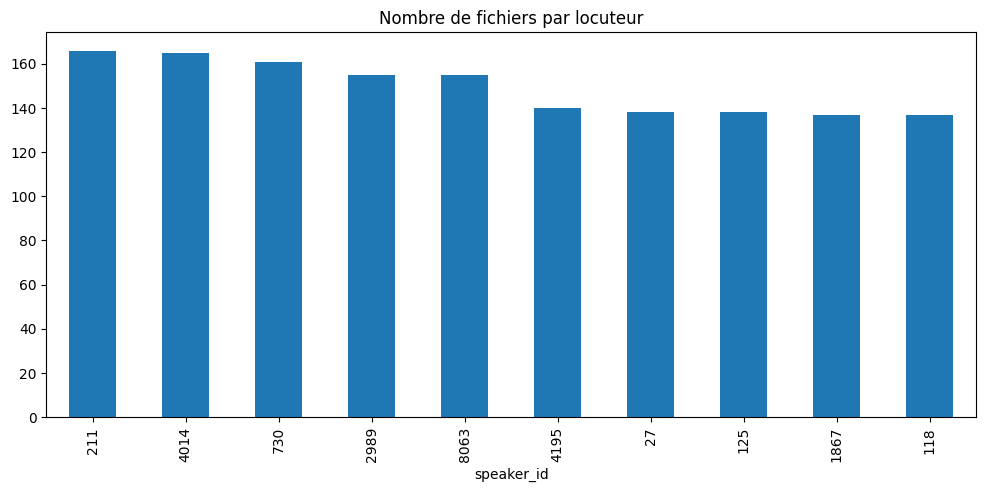

In [ ]:
# Nombre d'échantillons par locuteur
speaker_counts = df["speaker_id"].value_counts()

# Top 10 locuteurs avec le plus d'échantillons
speaker_counts.head(10).plot(kind="bar", figsize=(12, 5))
plt.title("Nombre de fichiers par locuteur")
plt.show()

count    28539.000000
mean        12.688853
std          3.574653
min          1.410000
25%         11.620000
50%         13.995000
75%         15.165000
max         24.525000
Name: duration, dtype: float64


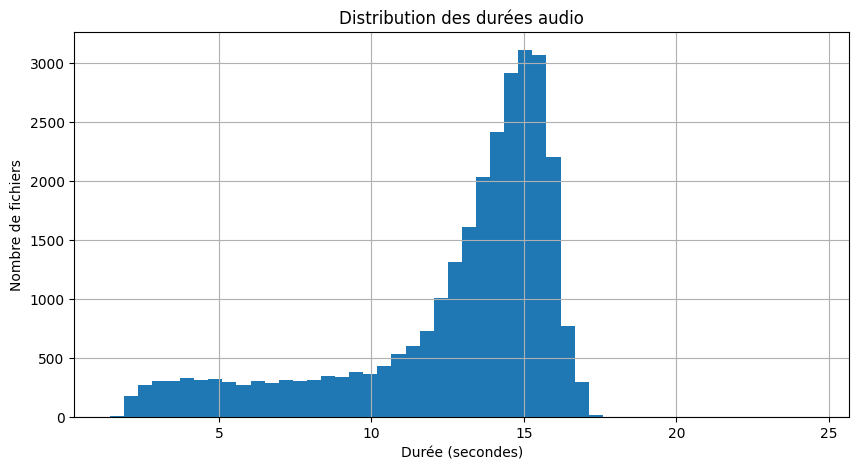

In [ ]:
# Statistiques descriptives
print(df["duration"].describe())

# Histogramme des durées
plt.figure(figsize=(10, 5))
df["duration"].hist(bins=50)
plt.title("Distribution des durées audio")
plt.xlabel("Durée (secondes)")
plt.ylabel("Nombre de fichiers")
plt.show()

In [ ]:
def check_audio_quality(audio_path):

    try:
        # Chargement du fichier
        y, sr = librosa.load(audio_path, sr=None, mono=True)

        # Métriques de base
        duration = len(y)/sr
        trimmed, _ = librosa.effects.trim(y, top_db=25)
        trimmed_duration = len(trimmed)/sr

        # Analyse SNR (version robuste)
        if len(trimmed) > 0:
            rms_signal = np.sqrt(np.mean(trimmed**2))
            noise = librosa.effects.preemphasis(trimmed)
            rms_noise = np.sqrt(np.mean(noise**2))
            snr = 20 * np.log10(rms_signal/(rms_noise + 1e-10)) if rms_noise > 0 else np.inf
        else:
            snr = np.nan

        return {
            'file_path': str(audio_path),
            'original_duration': duration,
            'trimmed_duration': trimmed_duration,
            'silence_ratio': 1 - (trimmed_duration/duration) if duration > 0 else 1,
            'max_amplitude': np.max(np.abs(y)),
            'mean_amplitude': np.mean(np.abs(y)),
            'snr_db': snr,
            'speaker_id': audio_path.parent.parent.name,
            'chapter_id': audio_path.parent.name
        }

    except Exception as e:
        print(f"Error processing {audio_path}: {str(e)}")
        return None

Analyzing audio quality: 100%|██████████| 1000/1000 [00:09<00:00, 102.21it/s]



📊 Rapport de Qualité Audio 📊
Fichiers analysés: 1000

🔍 Statistiques Clés:
       original_duration  trimmed_duration  silence_ratio       snr_db
count        1000.000000       1000.000000    1000.000000  1000.000000
mean           12.761465         12.224658       0.049265     8.500738
std             3.541462          3.541844       0.038482     3.820673
min             2.000000          1.344000       0.000000    -1.755235
25%            12.050000         11.456000       0.028437     6.265681
50%            14.000000         13.455000       0.041289     9.180155
75%            15.205000         14.688000       0.059321    11.239957
max            18.240063         17.504000       0.390476    23.766930


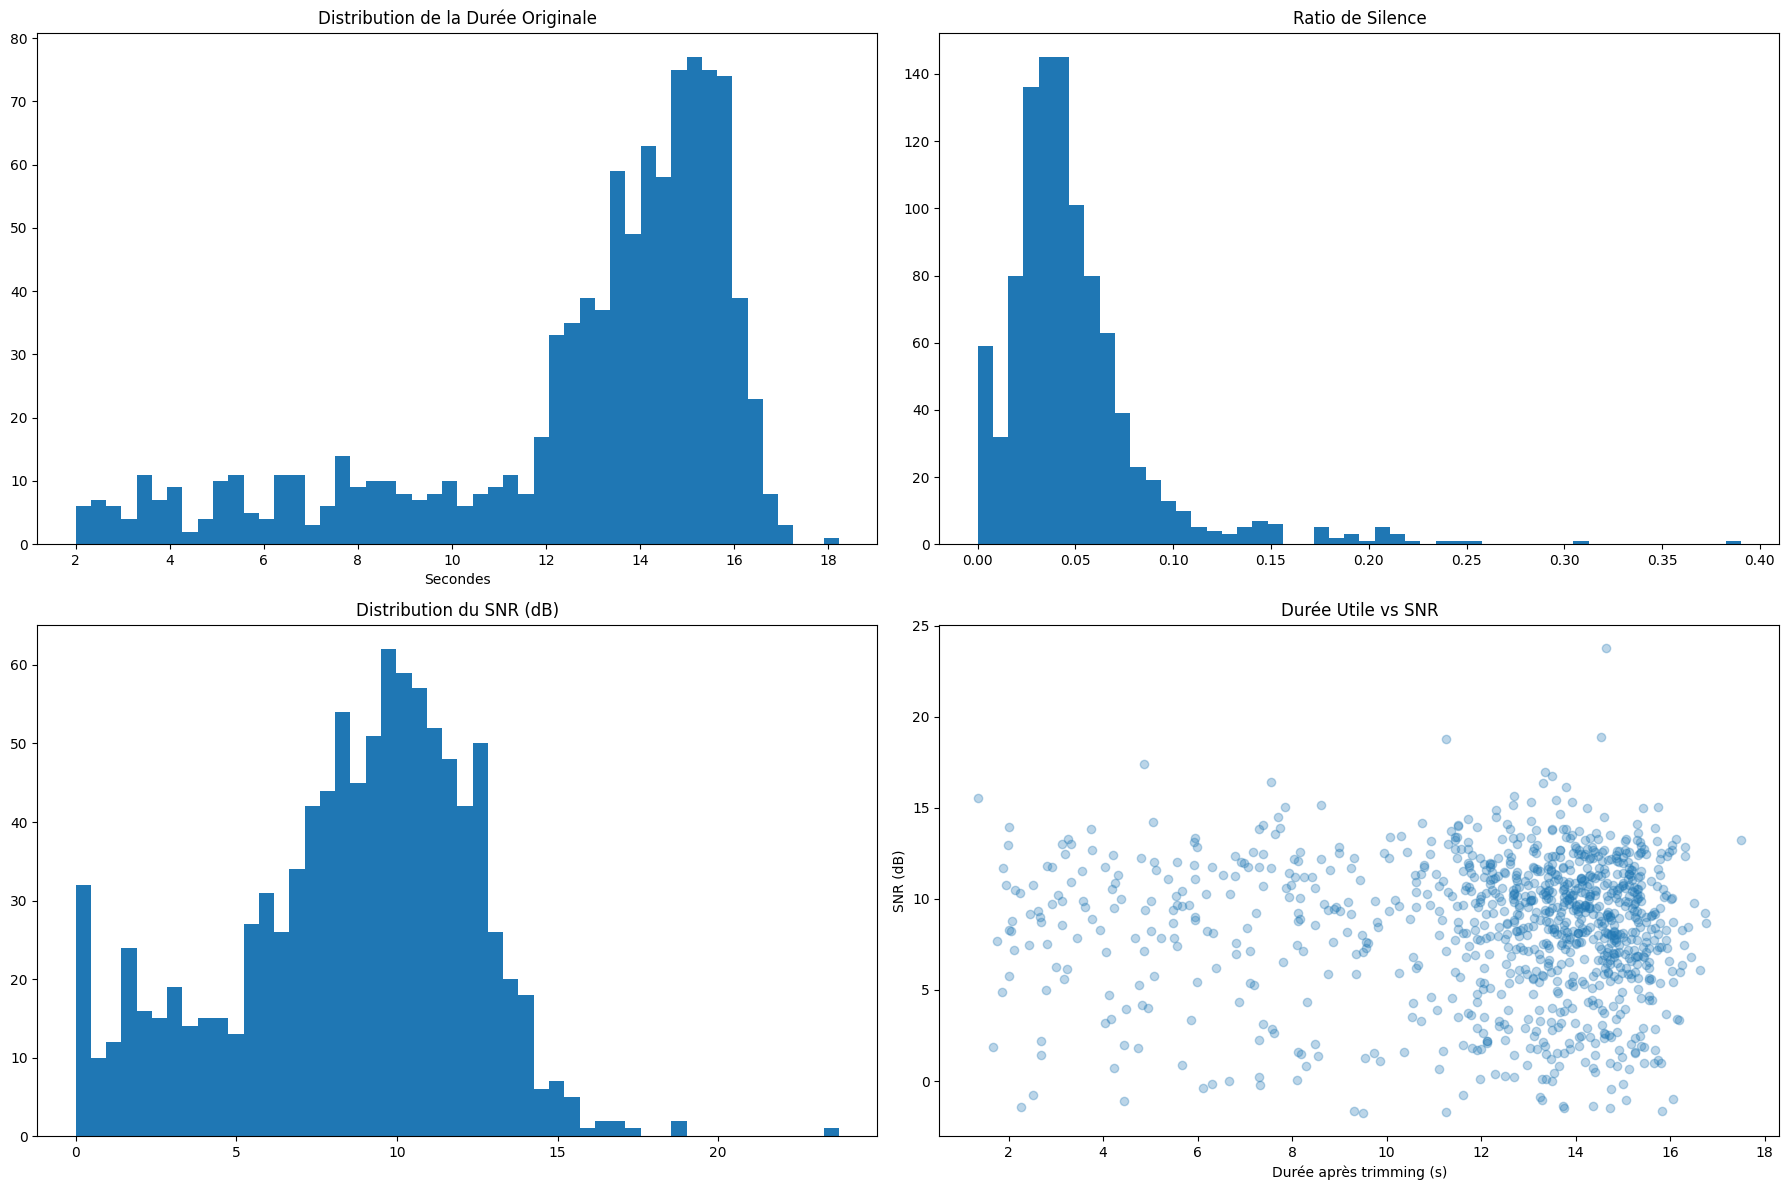


⚠️ Fichiers Potentiellement Problématiques:
                                           file_path speaker_id  \
0  /content/train-clean-100/train-clean-100/1970/...       1970   
2  /content/train-clean-100/train-clean-100/6081/...       6081   
3  /content/train-clean-100/train-clean-100/4195/...       4195   
4  /content/train-clean-100/train-clean-100/4297/...       4297   
5  /content/train-clean-100/train-clean-100/233/1...        233   

   trimmed_duration     snr_db  
0             5.952  11.068581  
2            11.104  10.696756  
3            14.048   9.180926  
4             8.096   0.062529  
5            15.424   7.343905  


In [ ]:
def run_quality_checks(dataset_path, sample_size=None):

    # Lister les fichiers audio
    audio_files = list(Path(dataset_path).rglob("*.flac"))
    if sample_size:
        audio_files = np.random.choice(audio_files, size=min(sample_size, len(audio_files)), replace=False)

    # Lancer l'analyse
    results = []
    for audio_path in tqdm(audio_files, desc="Analyzing audio quality"):
        result = check_audio_quality(audio_path)
        if result:
            results.append(result)

    # Créer le DataFrame
    df = pd.DataFrame(results)

    # Générer le rapport
    generate_quality_report(df)

    return df

def generate_quality_report(df):
    """Génère un rapport visuel de la qualité audio"""
    print("\n📊 Rapport de Qualité Audio 📊")
    print(f"Fichiers analysés: {len(df)}")
    print("\n🔍 Statistiques Clés:")
    print(df[['original_duration', 'trimmed_duration', 'silence_ratio', 'snr_db']].describe())

    # Visualisations
    plt.figure(figsize=(18, 12))

    # Distribution de durée
    plt.subplot(2, 2, 1)
    plt.hist(df['original_duration'], bins=50)
    plt.title("Distribution de la Durée Originale")
    plt.xlabel("Secondes")

    # Ratio de silence
    plt.subplot(2, 2, 2)
    plt.hist(df['silence_ratio'], bins=50)
    plt.title("Ratio de Silence")

    # SNR distribution
    plt.subplot(2, 2, 3)
    plt.hist(df['snr_db'].clip(0, 60), bins=50)
    plt.title("Distribution du SNR (dB)")

    # Relation durée/SNR
    plt.subplot(2, 2, 4)
    plt.scatter(df['trimmed_duration'], df['snr_db'], alpha=0.3)
    plt.title("Durée Utile vs SNR")
    plt.xlabel("Durée après trimming (s)")
    plt.ylabel("SNR (dB)")

    plt.tight_layout()
    plt.show()

    # Fichiers problématiques
    problematic = df[(df['snr_db'] < 15) | (df['trimmed_duration'] < 1)]
    if not problematic.empty:
        print("\n⚠️ Fichiers Potentiellement Problématiques:")
        print(problematic[['file_path', 'speaker_id', 'trimmed_duration', 'snr_db']].head())


if __name__ == "__main__":
    dataset_path = "/content/train-clean-100"
    audio_stats_df = run_quality_checks(dataset_path, sample_size=1000)


    audio_stats_df.to_csv("audio_quality_report.csv", index=False)

In [ ]:
print("Colonnes disponibles :", df.columns.tolist())
print("Aperçu des données :\n", df.head())

Colonnes disponibles : ['path', 'speaker_id', 'chapter_id', 'duration']
Aperçu des données :
                                                 path speaker_id chapter_id  \
0  /content/train-clean-100/train-clean-100/4362/...       4362      15663   
1  /content/train-clean-100/train-clean-100/4362/...       4362      15663   
2  /content/train-clean-100/train-clean-100/4362/...       4362      15663   
3  /content/train-clean-100/train-clean-100/4362/...       4362      15663   
4  /content/train-clean-100/train-clean-100/4362/...       4362      15663   

   duration  
0    13.170  
1    12.710  
2    14.835  
3    14.385  
4    13.900  


In [ ]:
def process_audio_features(file_path):
    try:
        y, sr = librosa.load(file_path, sr=None)

        # Durée originale
        original_duration = librosa.get_duration(y=y, sr=sr)

        # Suppression des silences
        y_trimmed, _ = librosa.effects.trim(y, top_db=20)
        trimmed_duration = librosa.get_duration(y=y_trimmed, sr=sr)

        # Calcul des métriques
        silence_ratio = 1 - (trimmed_duration / original_duration) if original_duration > 0 else 1

        # SNR
        signal_power = np.mean(y_trimmed**2)
        noise = y_trimmed - np.mean(y_trimmed)
        noise_power = np.mean(noise**2)
        snr_db = 10 * np.log10(signal_power / (noise_power + 1e-10)) if noise_power > 0 else np.inf

        return {
            'trimmed_duration': trimmed_duration,
            'silence_ratio': silence_ratio,
            'snr_db': snr_db
        }
    except Exception as e:
        print(f"Erreur avec {file_path}: {str(e)[:100]}...")
        return {
            'trimmed_duration': np.nan,
            'silence_ratio': np.nan,
            'snr_db': np.nan
        }

In [ ]:
tqdm.pandas(desc="Calcul des features audio")

# Création des nouvelles colonnes
df[['trimmed_duration', 'silence_ratio', 'snr_db']] = df['path'].progress_apply(
    lambda x: pd.Series(process_audio_features(x))
)

# Nettoyage des résultats
df = df.dropna(subset=['trimmed_duration', 'silence_ratio', 'snr_db'])

# Vérification
print("\n🔍 Statistiques des nouvelles colonnes :")
print(pd.DataFrame({
    'trimmed_duration': df['trimmed_duration'].describe(),
    'silence_ratio': df['silence_ratio'].describe(),
    'snr_db': df['snr_db'].describe()
}))

Calcul des features audio: 100%|██████████| 28538/28538 [04:30<00:00, 105.37it/s]


🔍 Statistiques des nouvelles colonnes :
       trimmed_duration  silence_ratio        snr_db
count      28538.000000   28538.000000  2.853800e+04
mean          12.069872       0.057205  7.584861e-02
std            3.569228       0.044039  7.864895e-01
min            0.704000       0.000000 -4.141757e-06
25%           10.944000       0.033123  0.000000e+00
50%           13.344000       0.047367  5.177193e-07
75%           14.560000       0.066565  1.242525e-05
max           24.032000       0.594937  1.825125e+01



<ipython-input-25-6622bed335ed>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['trimmed_duration', 'silence_ratio', 'snr_db']] = df['path'].progress_apply(
<ipython-input-25-6622bed335ed>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['trimmed_duration', 'silence_ratio', 'snr_db']] = df['path'].progress_apply(


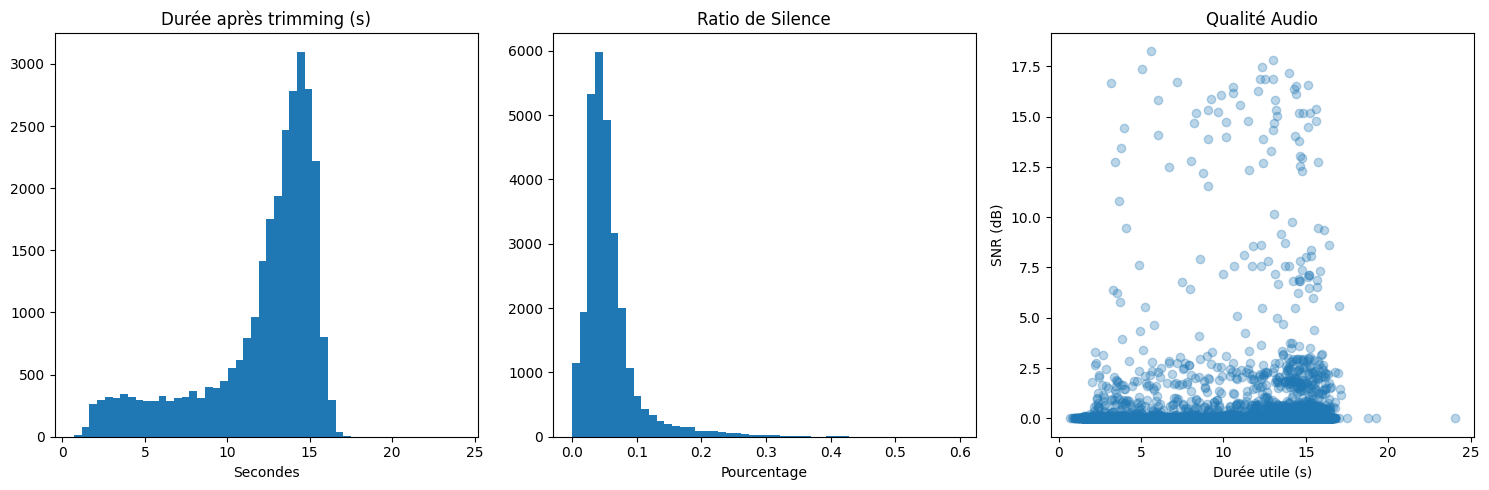

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

# Distribution de la durée utile
plt.subplot(1, 3, 1)
plt.hist(df['trimmed_duration'], bins=50)
plt.title('Durée après trimming (s)')
plt.xlabel('Secondes')

# Distribution du ratio de silence
plt.subplot(1, 3, 2)
plt.hist(df['silence_ratio'], bins=50)
plt.title('Ratio de Silence')
plt.xlabel('Pourcentage')

# Relation durée utile / SNR
plt.subplot(1, 3, 3)
plt.scatter(df['trimmed_duration'], df['snr_db'], alpha=0.3)
plt.title('Qualité Audio')
plt.xlabel('Durée utile (s)')
plt.ylabel('SNR (dB)')

plt.tight_layout()
plt.show()

#Extraction des features

In [ ]:
import warnings

In [ ]:
features=[]
labels=[]

In [ ]:
from pathlib import Path
import pandas as pd
import librosa
import numpy as np
import warnings
from tqdm import tqdm
import os

# Configuration
BASE_PATH = "/content/train-clean-100"
OUTPUT_CSV = "gmm_features_full.csv"
SAMPLE_RATE = 16000

# Fonction optimisée pour supprimer les silences
def remove_silence(audio, top_db=20, frame_length=2048, hop_length=512):
    try:
        intervals = librosa.effects.split(
            audio,
            top_db=top_db,
            frame_length=frame_length,
            hop_length=hop_length
        )
        return np.concatenate([audio[start:end] for start, end in intervals])
    except:
        return audio

# Fonction d'extraction des features optimisée pour GMM
def extract_features(audio, sr):
    try:
        if len(audio) < 2048:  # Minimum pour l'analyse
            return None

        # MFCC avec deltas (40 dimensions)
        mfcc = librosa.feature.mfcc(
            y=audio,
            sr=sr,
            n_mfcc=20,
            n_fft=2048,
            hop_length=512
        )
        mfcc_mean = np.mean(mfcc, axis=1)

        deltas = librosa.feature.delta(mfcc)
        delta_mean = np.mean(deltas, axis=1)

        # Caractéristiques spectrales
        spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=audio, sr=sr))
        zcr = np.mean(librosa.feature.zero_crossing_rate(audio))
        chroma = librosa.feature.chroma_stft(y=audio, sr=sr)
        chroma_mean = np.mean(chroma, axis=1)


        return np.concatenate([
            mfcc_mean,       # 20
            delta_mean,      # 20
            [spectral_centroid],  # 1
            [zcr],           # 1
            chroma_mean      # 12
        ])

    except Exception as e:
        warnings.warn(f"Feature extraction error: {str(e)[:100]}...")
        return None

# Traitement de tous les fichiers
def process_all_files(base_path):
    audio_files = list(Path(base_path).rglob("*.flac"))
    features = []
    labels = []
    failed_files = []

    for audio_path in tqdm(audio_files, desc="Processing ALL audio files"):
        try:
            # Chargement avec vérification
            y, sr = librosa.load(
                audio_path,
                sr=SAMPLE_RATE,
                mono=True,
                duration=30
            )

            # Prétraitement
            y_trimmed = remove_silence(y)
            if len(y_trimmed) < 0.1 * sr:
                continue

            # Extraction
            feat = extract_features(y_trimmed, sr)
            if feat is not None:
                features.append(feat)
                labels.append(audio_path.parent.parent.name)  # speaker_id

        except Exception as e:
            failed_files.append((audio_path.name, str(e)))
            continue

    return features, labels, failed_files


if __name__ == "__main__":
    print(f"Début du traitement de toute la base de données dans {BASE_PATH}...")

    features, labels, failed_files = process_all_files(BASE_PATH)

    if features:
        # Création du DataFrame avec les bonnes colonnes
        feat_columns = (
            [f"mfcc_mean_{i}" for i in range(20)] +
            [f"delta_{i}" for i in range(20)] +
            ["spectral_centroid", "zcr"] +
            [f"chroma_{i}" for i in range(12)]
        )

        features_df = pd.DataFrame(features, columns=feat_columns)
        features_df["speaker_id"] = labels

        # Sauvegarde avec vérification
        temp_file = OUTPUT_CSV + ".temp"
        features_df.to_csv(temp_file, index=False)

        # Vérification
        try:
            test_load = pd.read_csv(temp_file)
            test_load.to_csv(OUTPUT_CSV, index=False)
            os.remove(temp_file)
            print(f"\n✅ {len(features_df)} fichiers traités avec succès!")
            print(f"📊 Dimensions des features: {features_df.shape[1]-1} par échantillon")

            if failed_files:
                print(f"⚠️ {len(failed_files)} fichiers échoués (voir failed_files.log)")
                with open("failed_files.log", "w") as f:
                    f.write("\n".join([f"{f[0]}: {f[1]}" for f in failed_files]))

        except Exception as e:
            print(f"❌ Erreur lors de la sauvegarde: {e}")
    else:
        print("❌ Aucune feature valide extraite!")

Début du traitement de toute la base de données dans /content/train-clean-100...


Processing ALL audio files: 100%|██████████| 28539/28539 [38:38<00:00, 12.31it/s]



✅ 28539 fichiers traités avec succès!
📊 Dimensions des features: 54 par échantillon


In [ ]:
features_df.describe()

mfcc_mean_0   mfcc_mean_1   mfcc_mean_2   mfcc_mean_3   mfcc_mean_4  \
count  28539.000000  28539.000000  28539.000000  28539.000000  28539.000000   
mean    -245.499079     92.176128     -5.136965     28.009877     -6.593465   
std       37.091223     30.030344     18.287255     13.886380     12.911878   
min     -416.464539    -20.201025   -102.580429    -37.381123    -61.876560   
25%     -266.951950     72.812309    -16.990054     19.634322    -14.497403   
50%     -244.771759     95.650124     -4.753652     28.274328     -6.132407   
75%     -222.739090    111.964691      7.140793     36.963717      1.806341   
max      -50.511932    184.187866     59.935402     96.887299     41.275127   

        mfcc_mean_5   mfcc_mean_6   mfcc_mean_7   mfcc_mean_8   mfcc_mean_9  \
count  28539.000000  28539.000000  28539.000000  28539.000000  28539.000000   
mean      -4.318146    -10.781763     -9.946577     -5.278463     -5.261080   
std       10.933479     10.160926      9.574172      7.788324      6.905451   
min      -50.002445    -50.727688    -44.639500    -34.064171    -35.413086   
25%      -11.092305    -17.263390    -16.262009    -10.489284     -9.996319   
50%       -3.879515     -9.990648     -9.591238     -4.631505     -5.442019   
75%        3.194655     -3.711612     -3.435469      0.251081     -0.423338   
max       30.865889     21.521444     18.717642     23.110266     23.890169   

       ...      chroma_2      chroma_3      chroma_4      chroma_5  \
count  ...  28539.000000  28539.000000  28539.000000  28539.000000   
mean   ...      0.309595      0.311332      0.319101      0.331857   
std    ...      0.087501      0.088662      0.084803      0.083118   
min    ...      0.036075      0.040462      0.040199      0.035435   
25%    ...      0.251554      0.252520      0.263497      0.276634   
50%    ...      0.309797      0.309482      0.316991      0.329716   
75%    ...      0.364730      0.367522      0.374183      0.386543   
max    ...      0.782916      0.711374      0.693995      0.815248   

           chroma_6      chroma_7      chroma_8      chroma_9     chroma_10  \
count  28539.000000  28539.000000  28539.000000  28539.000000  28539.000000   
mean       0.348607      0.361231      0.365336      0.364475      0.359273   
std        0.083490      0.084227      0.083819      0.082998      0.083502   
min        0.048366      0.076497      0.052487      0.071876      0.073360   
25%        0.293354      0.304047      0.307820      0.307276      0.302636   
50%        0.346767      0.360778      0.364592      0.363858      0.358966   
75%        0.403189      0.417684      0.420592      0.419920      0.412847   
max        0.701745      0.726391      0.739668      0.813386      0.912993   

          chroma_11  
count  28539.000000  
mean       0.347225  
std        0.085775  
min        0.070127  
25%        0.291618  
50%        0.346593  
75%        0.398556  
max        0.961119  

[8 rows x 54 columns]

In [ ]:
features_df.shape

(28539, 55)

In [ ]:
#Checking for missing values
print(features_df.isnull().sum())

mfcc_mean_0          0
mfcc_mean_1          0
mfcc_mean_2          0
mfcc_mean_3          0
mfcc_mean_4          0
mfcc_mean_5          0
mfcc_mean_6          0
mfcc_mean_7          0
mfcc_mean_8          0
mfcc_mean_9          0
mfcc_mean_10         0
mfcc_mean_11         0
mfcc_mean_12         0
mfcc_mean_13         0
mfcc_mean_14         0
mfcc_mean_15         0
mfcc_mean_16         0
mfcc_mean_17         0
mfcc_mean_18         0
mfcc_mean_19         0
delta_0              0
delta_1              0
delta_2              0
delta_3              0
delta_4              0
delta_5              0
delta_6              0
delta_7              0
delta_8              0
delta_9              0
delta_10             0
delta_11             0
delta_12             0
delta_13             0
delta_14             0
delta_15             0
delta_16             0
delta_17             0
delta_18             0
delta_19             0
spectral_centroid    0
zcr                  0
chroma_0             0
chroma_1   

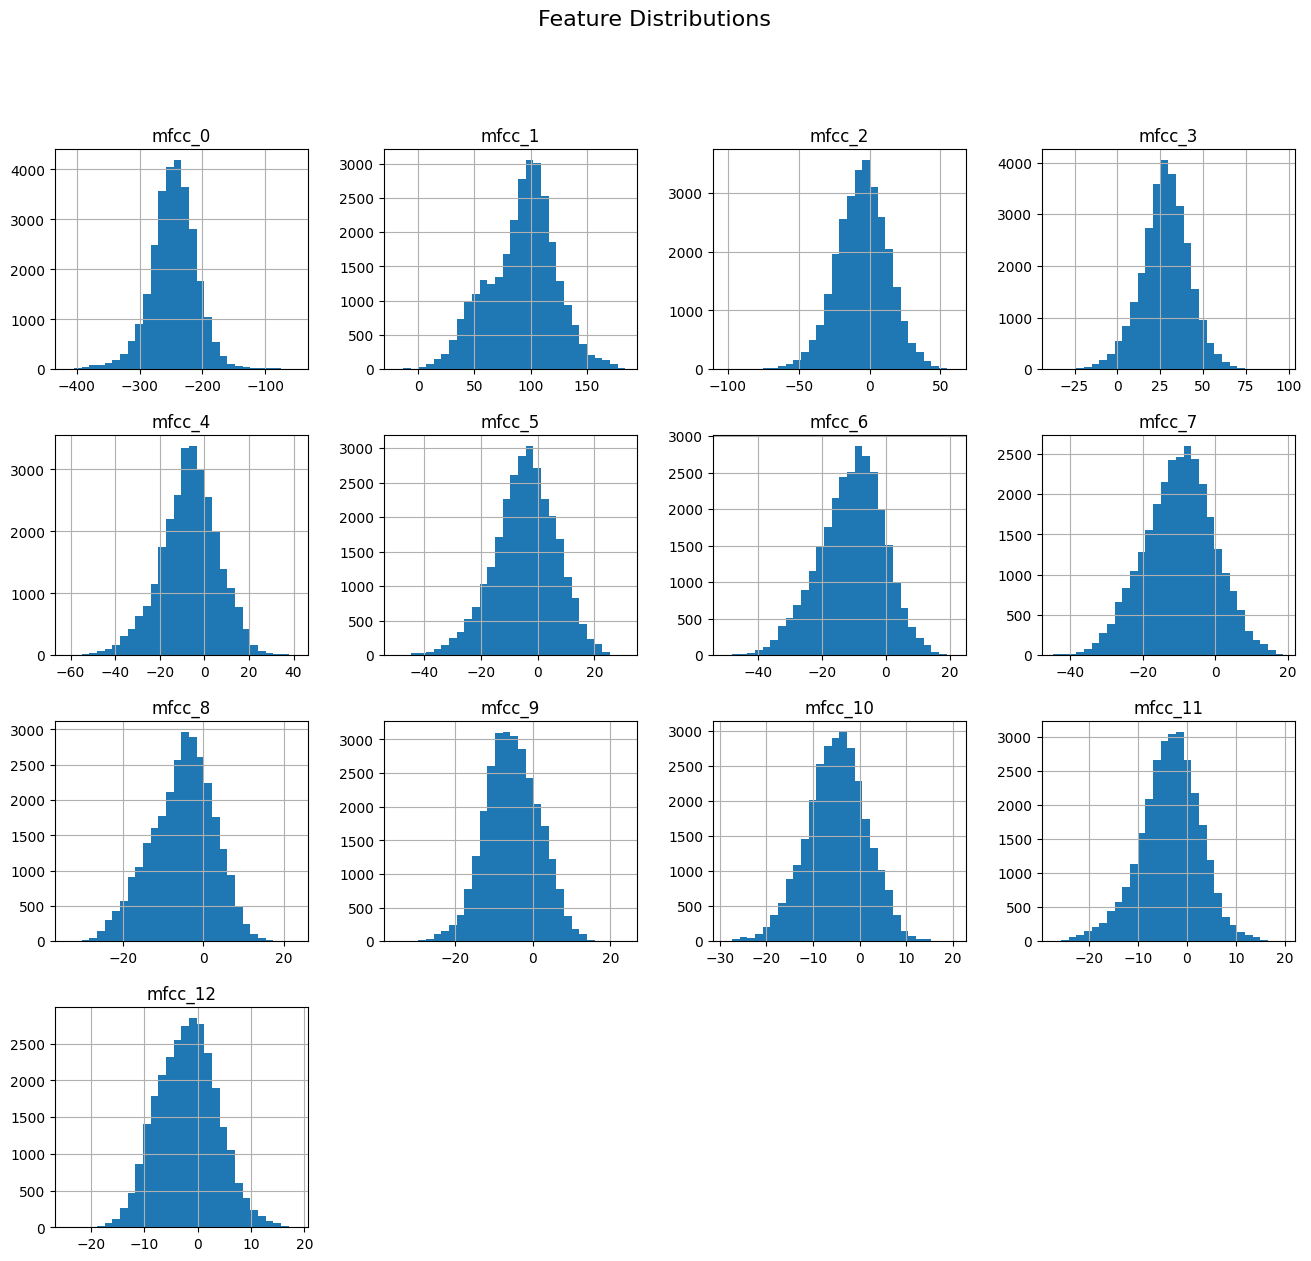

In [ ]:
#Checking the feature distributions


features_df.hist(figsize=(16, 14), bins=30)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

In [ ]:
import seaborn as sns

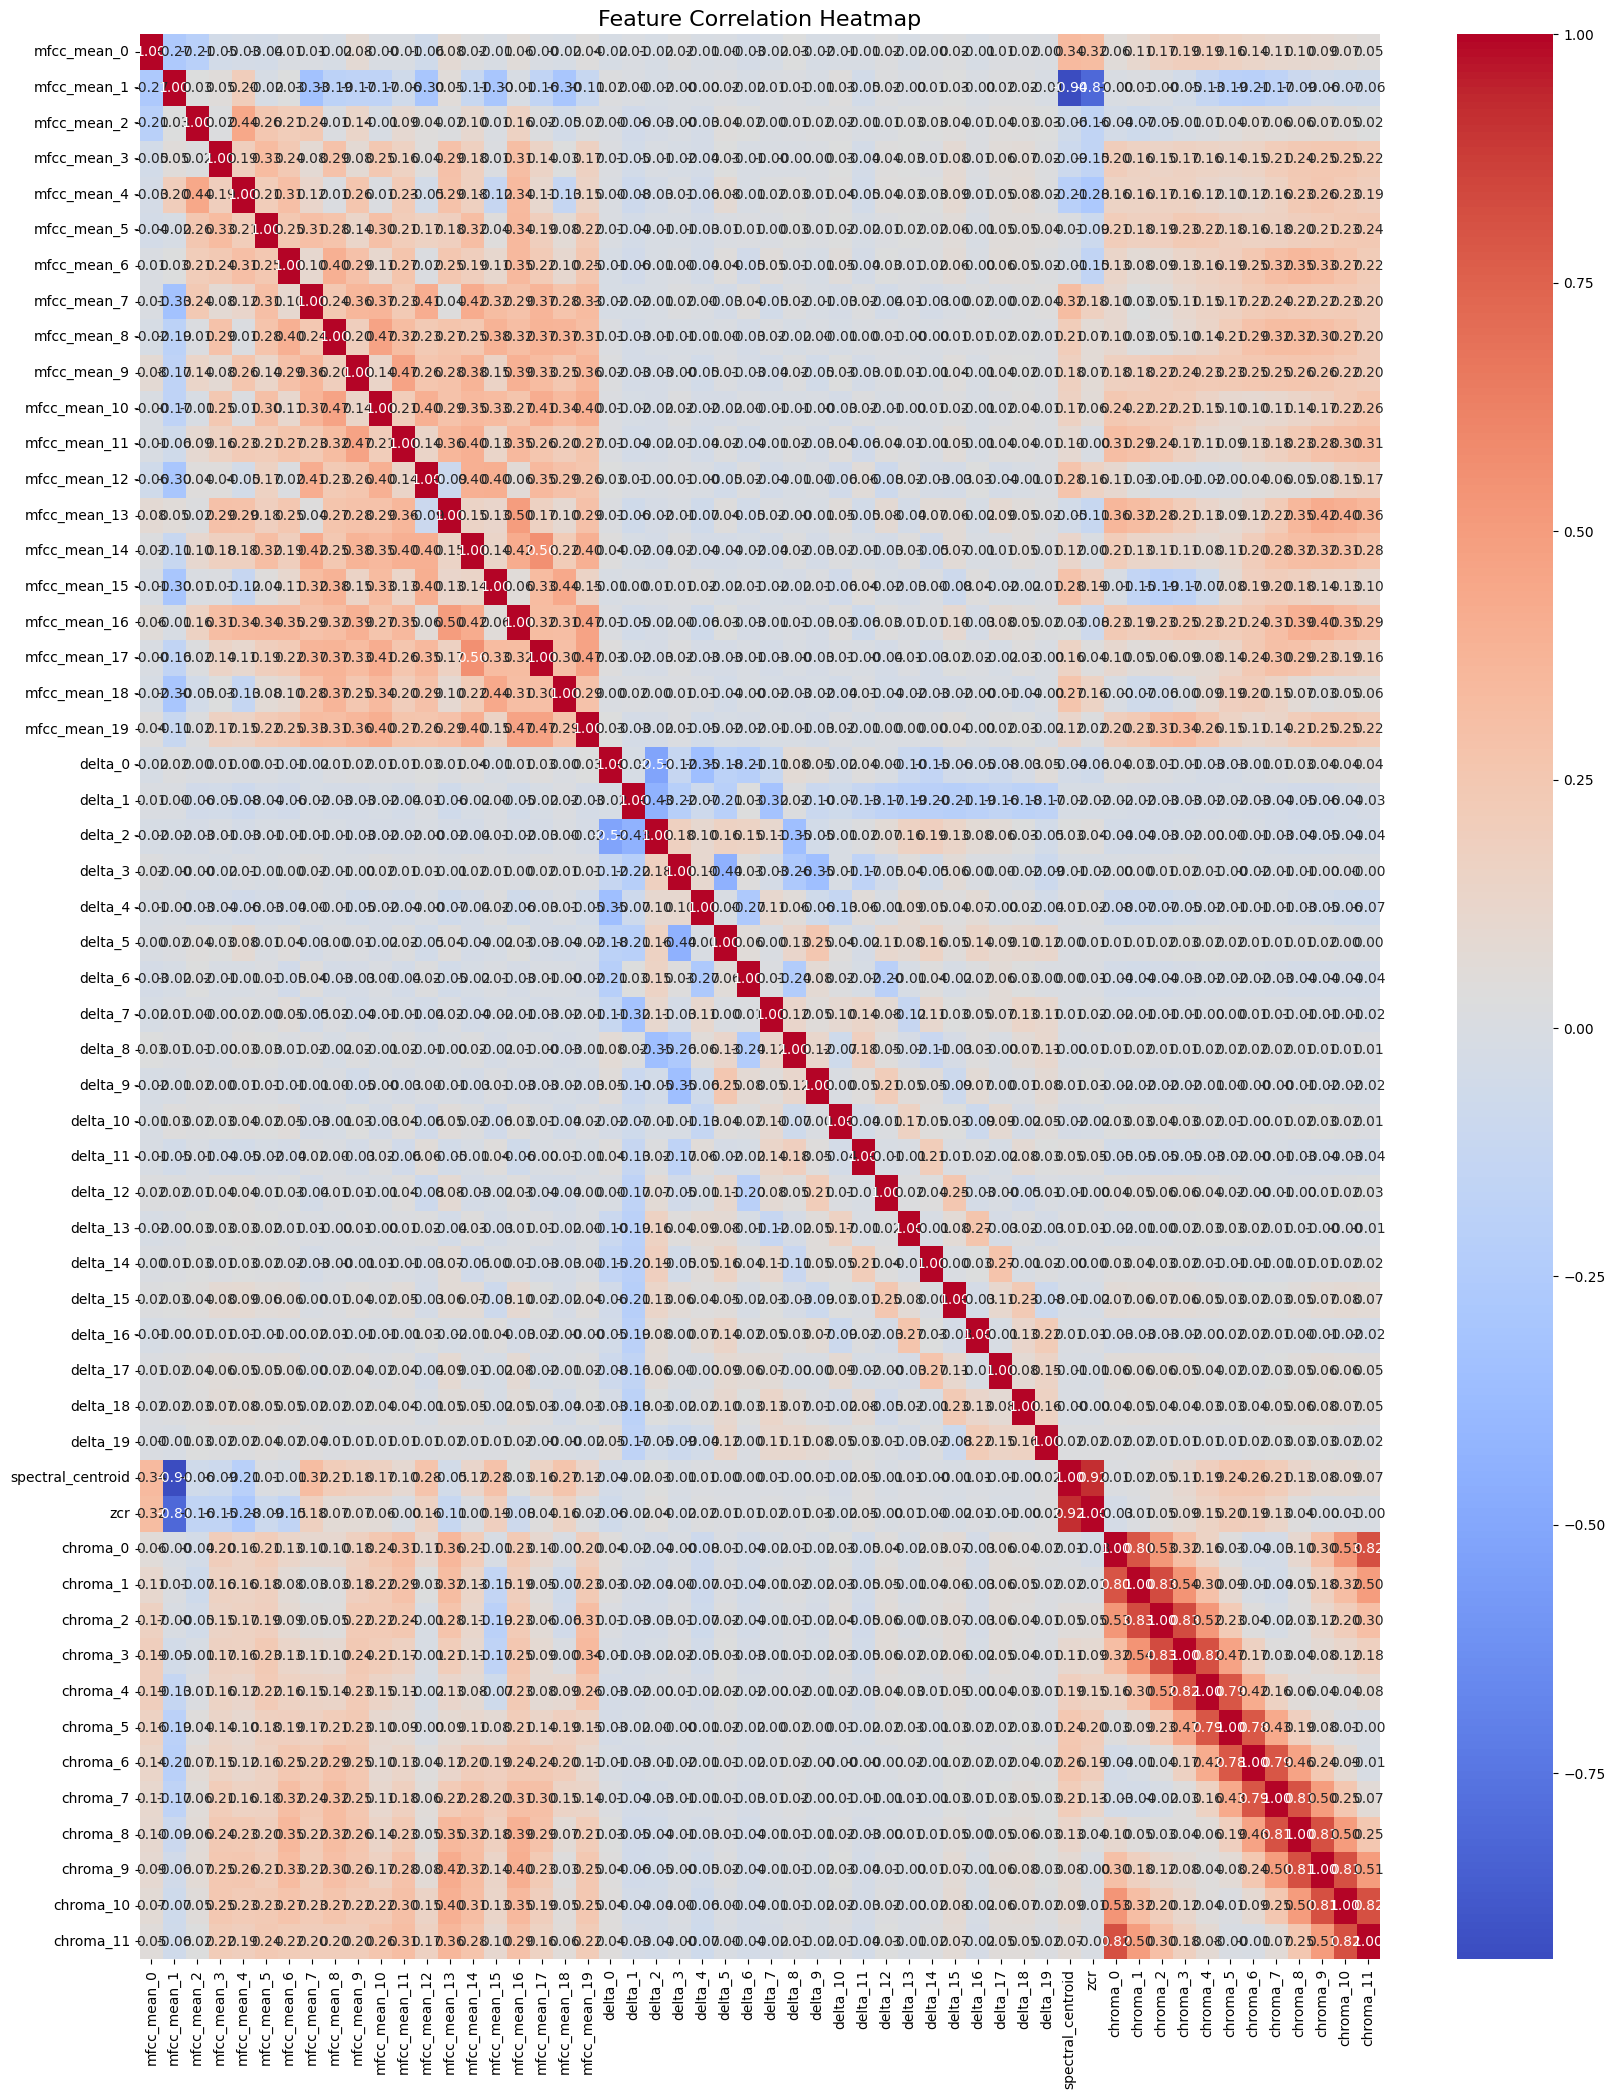

In [ ]:
# Vérifier si le DataFrame est défini et contient des valeurs
if "features_df" in locals() and not df.empty:
    # Supprimer la colonne "audio_path" :parce qu'elle contient des valeurs non numériques (des chaînes de caractères représentant les noms de fichiers audio)
    numeric_df = features_df.drop(columns=["speaker_id"], errors="ignore")

    # Vérifier qu'il reste des colonnes numériques pour la heatmap
    if not numeric_df.empty:
        plt.figure(figsize=(20, 25))
        sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size": 10})
        plt.title("Feature Correlation Heatmap", fontsize=16)
        plt.show()
    else:
        print("❌ Aucune donnée numérique disponible pour générer la heatmap.")
else:
    print("❌ Le DataFrame est vide ou non défini. Vérifiez l'extraction des features.")

#GMM

In [ ]:
import pickle

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

In [ ]:
# Function to find the best n_components using BIC
def select_best_n_components(X, max_components=10):
    bic_scores = []
    components_range = range(1, max_components + 1)

    for n in components_range:
        gmm = GaussianMixture(n_components=n, covariance_type='diag', max_iter=200, random_state=42)
        gmm.fit(X)                                  # the covariance_type='diag' param means that the model assumes the features are uncorrelated and only considers the variances of each feature.
        bic_scores.append(gmm.bic(X))               #the max_iter means that the algorithm will perform up to 200 iterations to converge to a solution. If the algorithm converges before reaching 200 iterations, it will stop earlier.

    best_n_bic = components_range[np.argmin(bic_scores)]
    return best_n_bic

In [ ]:
from sklearn.metrics import accuracy_score, roc_curve
from sklearn.model_selection import train_test_split

In [ ]:
X = features_df.drop(columns=["speaker_id"]).values  # Features
y = features_df["speaker_id"].values  # Labels des locuteurs

# Diviser les données en train et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Dictionnaire pour stocker les modèles GMM entraînés
gmm_models = {}

# Obtenir les identifiants uniques des locuteurs
unique_speakers = np.unique(y_train)

# Entraîner un GMM pour chaque locuteur
for speaker_id in unique_speakers:
    print(f"🔹 Training GMM for Speaker {speaker_id}...")

    # Récupérer les features de ce locuteur
    speaker_features = X_train[y_train == speaker_id]

    # Sélection du meilleur n_components
    best_n = select_best_n_components(speaker_features, max_components=10)
    print(f"🔹 Optimal n_components for Speaker {speaker_id}: {best_n}")

    # Entraîner le GMM
    gmm = GaussianMixture(n_components=best_n, covariance_type='diag', max_iter=200, random_state=42)
    gmm.fit(speaker_features)

    # Stocker le modèle
    gmm_models[speaker_id] = gmm

# Sauvegarder les modèles entraînés
with open("gmm_models.pkl", 'wb') as f:
    pickle.dump(gmm_models, f)

print("✅ GMM Models trained with optimal n_components and saved successfully!")

🔹 Training GMM for Speaker 103...
🔹 Optimal n_components for Speaker 103: 2
🔹 Training GMM for Speaker 1034...
🔹 Optimal n_components for Speaker 1034: 3
🔹 Training GMM for Speaker 1040...
🔹 Optimal n_components for Speaker 1040: 1
🔹 Training GMM for Speaker 1069...
🔹 Optimal n_components for Speaker 1069: 2
🔹 Training GMM for Speaker 1081...
🔹 Optimal n_components for Speaker 1081: 3
🔹 Training GMM for Speaker 1088...
🔹 Optimal n_components for Speaker 1088: 4
🔹 Training GMM for Speaker 1098...
🔹 Optimal n_components for Speaker 1098: 7
🔹 Training GMM for Speaker 1116...
🔹 Optimal n_components for Speaker 1116: 3
🔹 Training GMM for Speaker 118...
🔹 Optimal n_components for Speaker 118: 6
🔹 Training GMM for Speaker 1183...
🔹 Optimal n_components for Speaker 1183: 2
🔹 Training GMM for Speaker 1235...
🔹 Optimal n_components for Speaker 1235: 3
🔹 Training GMM for Speaker 1246...
🔹 Optimal n_components for Speaker 1246: 2
🔹 Training GMM for Speaker 125...
🔹 Optimal n_components for Speaker

In [ ]:
# Fonction de prédiction du locuteur
def predict_speaker(feature_vector, gmm_models):

    log_likelihoods = {speaker: gmm.score(feature_vector.reshape(1, -1)) for speaker, gmm in gmm_models.items()}
    return max(log_likelihoods, key=log_likelihoods.get)

In [ ]:
# Évaluer la précision du modèle GMM
correct_predictions = 0

for i in range(len(X_test)):
    feature_vector = X_test[i]
    true_speaker = y_test[i]
    predicted_speaker = predict_speaker(feature_vector.reshape(1, -1), gmm_models)

    if predicted_speaker == true_speaker:
        correct_predictions += 1

# Calcul et affichage de la précision
accuracy = correct_predictions / len(X_test) * 100
print(f"🔹 GMM Test Accuracy: {accuracy:.2f}%")

🔹 GMM Test Accuracy: 95.53%


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
def visualize_results(y_test, predictions, unique_speakers):
    # Matrice de confusion
    cm = confusion_matrix(y_test, predictions)

    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt='d',
                xticklabels=unique_speakers,
                yticklabels=unique_speakers)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.savefig('gmm_confusion_matrix.png')
    plt.show()

    # Rapport de classification
    print("\nClassification Report:")
    print(classification_report(y_test, predictions))

🔹 GMM Test Accuracy: 95.53%


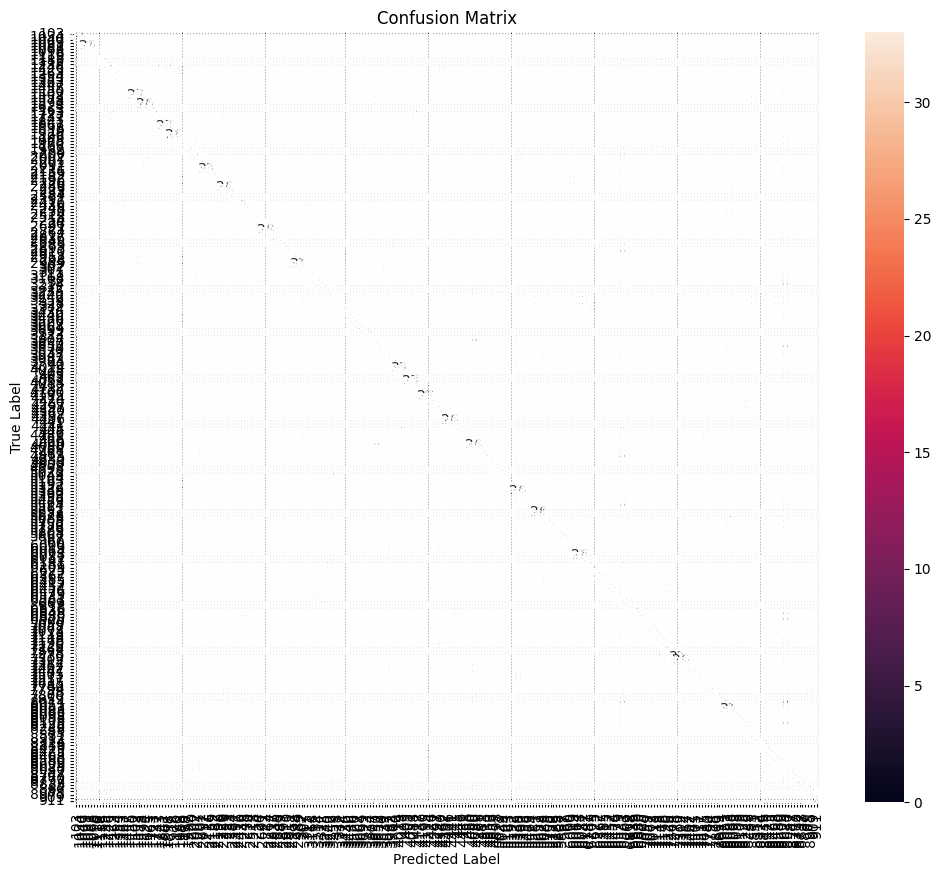


Classification Report:


NameError: name 'classification_report' is not defined

In [ ]:
# Évaluer la précision du modèle GMM
predictions = []
for i in range(len(X_test)):
    feature_vector = X_test[i]
    predicted_speaker = predict_speaker(feature_vector.reshape(1, -1), gmm_models)
    predictions.append(predicted_speaker)

accuracy = accuracy_score(y_test, predictions)
print(f"🔹 GMM Test Accuracy: {accuracy:.2%}")


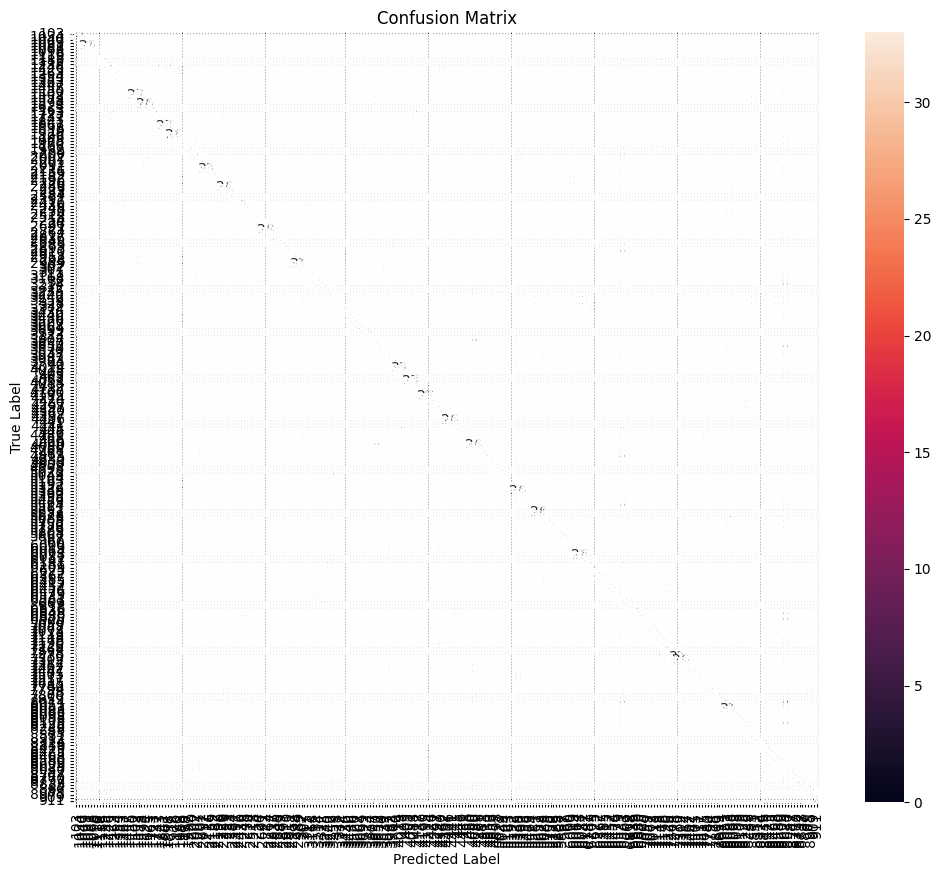


Classification Report:
              precision    recall  f1-score   support

         103       1.00      1.00      1.00        20
        1034       0.86      1.00      0.93        19
        1040       0.93      0.81      0.87        16
        1069       1.00      1.00      1.00        22
        1081       1.00      1.00      1.00        26
        1088       1.00      0.95      0.98        22
        1098       1.00      1.00      1.00        18
        1116       1.00      0.96      0.98        25
         118       1.00      0.93      0.96        27
        1183       0.86      0.92      0.89        13
        1235       0.96      0.92      0.94        25
        1246       0.95      0.91      0.93        23
         125       0.81      0.89      0.85        28
        1263       1.00      1.00      1.00        22
        1334       1.00      0.95      0.98        21
        1355       0.95      1.00      0.98        20
        1363       1.00      1.00      1.00        20
   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Visualisations
visualize_results(y_test, predictions, unique_speakers)

In [ ]:
def plot_speaker_likelihoods(gmm_models, X_test, y_test):

    plt.figure(figsize=(14, 8))

    # Calcul des log-vraisemblances pour chaque échantillon
    all_log_likelihoods = []
    speaker_predictions = []

    for x in X_test:
        x_reshaped = x.reshape(1, -1)
        # Prédiction et score
        predicted_speaker = predict_speaker(x_reshaped, gmm_models)
        log_likelihood = gmm_models[predicted_speaker].score(x_reshaped)

        all_log_likelihoods.append(log_likelihood)
        speaker_predictions.append(predicted_speaker)

    all_log_likelihoods = np.array(all_log_likelihoods)
    speaker_predictions = np.array(speaker_predictions)

    # Tracer les distributions par locuteur réel
    for speaker in gmm_models.keys():
        # Indices où le locuteur réel est 'speaker'
        speaker_idx = np.where(y_test == speaker)[0]

        if len(speaker_idx) > 0:  # Vérifier qu'il y a des échantillons
            sns.kdeplot(
                all_log_likelihoods[speaker_idx],
                label=f'Speaker {speaker} (n={len(speaker_idx)})',
                fill=True,
                alpha=0.4
            )

    # Visualisation
    plt.xlabel("Log-Likelihood Score", fontsize=12)
    plt.ylabel("Density", fontsize=12)
    plt.title("Distribution des Log-Vraisemblances par Locuteur Réel", fontsize=14, pad=20)
    plt.legend(title="Locuteurs", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(alpha=0.2)


    mean_ll = np.mean(all_log_likelihoods)
    plt.axvline(mean_ll, color='red', linestyle='--',
               label=f'Moyenne globale: {mean_ll:.2f}')

    plt.tight_layout()
    plt.show()

    return all_log_likelihoods, speaker_predictions

<ipython-input-69-d5b9ffabcc6b>:57: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


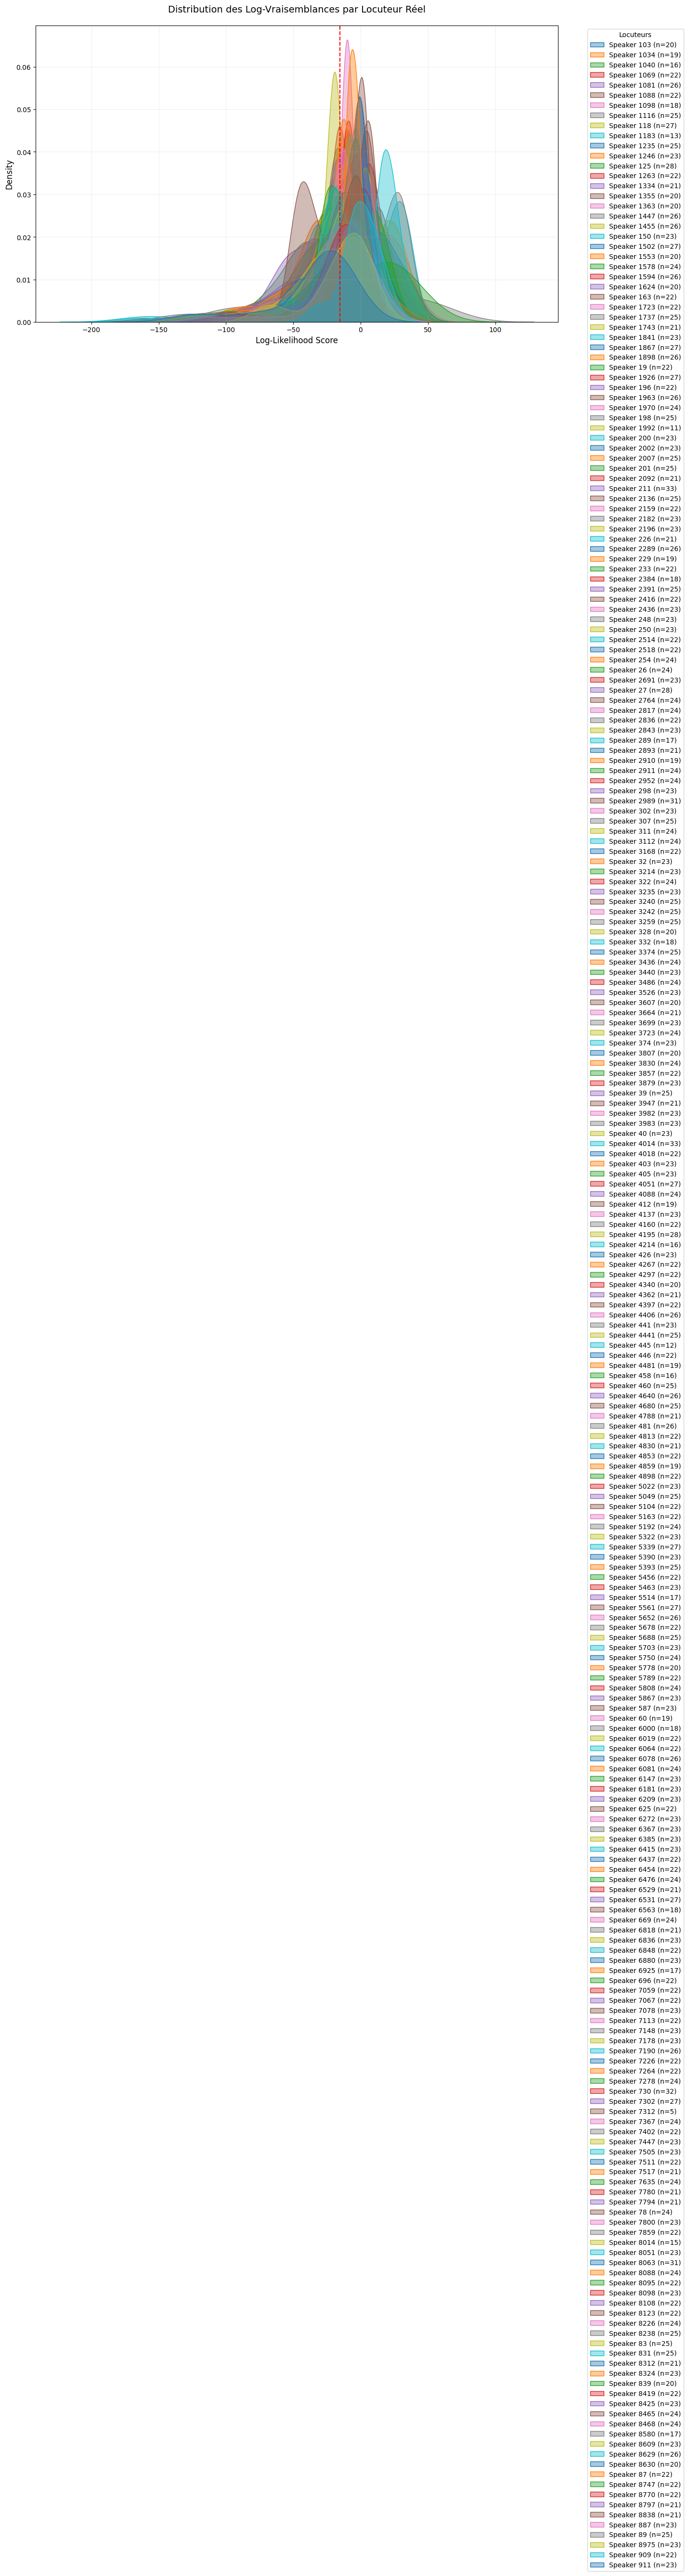

In [ ]:
log_likelihoods, predictions = plot_speaker_likelihoods(gmm_models, X_test, y_test)

 GMM (seulement 13 MFCC)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
pip install webrtcvad

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for webrtcvad: filename=webrtcvad-2.0.10-cp311-cp311-linux_x86_64.whl size=73507 sha256=84add044de9a5107cb9f26d422f8268e6e70c2c63e017a8be945a659497faae7
  Stored in directory: /root/.cache/pip/wheels/94/65/3f/292d0b656be33d1c801831201c74b5f68f41a2ae465ff2ee2f
Successfully built webrtcvad


In [ ]:
# Configuration
BASE_PATH = "/content/train-clean-100"
OUTPUT_CSV = "gmm_features_full.csv"
SAMPLE_RATE = 16000


#  GMM (seulement 13 MFCC)
def extract_features_mfcc(audio, sr):
    try:
        if len(audio) < 2048:  # Minimum pour l'analyse
            return None

        # Extraction des 13 MFCC seulement
        mfcc = librosa.feature.mfcc(
            y=audio,
            sr=sr,
            n_mfcc=13,
            n_fft=2048,
            hop_length=512
        )
        mfcc_mean = np.mean(mfcc, axis=1)

        return mfcc_mean

    except Exception as e:
        warnings.warn(f"Feature extraction error: {str(e)[:100]}...")
        return None

# Traitement de tous les fichiers
def process_all_files(base_path):
    audio_files = list(Path(base_path).rglob("*.flac"))
    features = []  # J'ai simplifié le nom de la variable
    labels = []
    failed_files = []

    for audio_path in tqdm(audio_files, desc="Processing ALL audio files"):
        try:
            # Chargement avec vérification
            y, sr = librosa.load(
                audio_path,
                sr=SAMPLE_RATE,
                mono=True,
                duration=30  # Limite à 30s pour les longs fichiers
            )

            # Prétraitement
            y_trimmed = remove_silence(y)
            if len(y_trimmed) < 0.1 * sr:
                continue

            # Extraction
            feat = extract_features_mfcc(y_trimmed, sr)
            if feat is not None:
                features.append(feat)  # Correction: utiliser features au lieu de features_df
                labels.append(audio_path.parent.parent.name)  # speaker_id

        except Exception as e:
            failed_files.append((audio_path.name, str(e)))
            continue

    return features, labels, failed_files

In [ ]:
if __name__ == "__main__":
    print(f"Début du traitement de toute la base de données dans {BASE_PATH}...")

    features, labels, failed_files = process_all_files(BASE_PATH)

    if features:
        # Création du DataFrame avec seulement les colonnes MFCC (13 features)
        feat_columns = [f"mfcc_{i}" for i in range(13)]

        features_df = pd.DataFrame(features, columns=feat_columns)
        features_df["speaker_id"] = labels  # Correction: utiliser labels au lieu de labels_mfcc

        # Sauvegarde avec vérification
        temp_file = OUTPUT_CSV + ".temp"
        features_df.to_csv(temp_file, index=False)

        # Vérification de l'intégrité avant sauvegarde finale
        try:
            test_load = pd.read_csv(temp_file)
            test_load.to_csv(OUTPUT_CSV, index=False)
            os.remove(temp_file)
            print(f"\n✅ {len(features_df)} fichiers traités avec succès!")
            print(f"📊 Dimensions des features: {features_df.shape[1]-1} par échantillon")

            if failed_files:
                print(f"⚠️ {len(failed_files)} fichiers échoués (voir failed_files.log)")
                with open("failed_files.log", "w") as f:
                    f.write("\n".join([f"{f[0]}: {f[1]}" for f in failed_files]))

        except Exception as e:
            print(f"❌ Erreur lors de la sauvegarde: {e}")
    else:
        print("❌ Aucune feature valide extraite!")

Début du traitement de toute la base de données dans /content/train-clean-100...


Processing ALL audio files: 100%|██████████| 28539/28539 [14:24<00:00, 33.00it/s]



✅ 28539 fichiers traités avec succès!
📊 Dimensions des features: 13 par échantillon


In [ ]:
features_df

mfcc_0      mfcc_1     mfcc_2     mfcc_3     mfcc_4     mfcc_5  \
0     -274.236938   88.137939  -7.967086  25.659466  -2.332062 -17.691584   
1     -249.109375   85.765106 -11.086128  23.215719  -1.411387 -18.325396   
2     -275.132782   92.815552  -4.945016  14.273502  -0.429189 -18.570770   
3     -250.626328   84.600960 -12.504817  23.122238  -5.145482 -16.941753   
4     -272.610413   94.413391  -7.314895  26.115894  -3.188232 -12.869391   
...           ...         ...        ...        ...        ...        ...   
28534 -239.819336  106.400398  -2.128748  25.988491 -17.516827 -24.996658   
28535 -231.791885  100.530907  -0.633719  18.956003  -6.220651 -21.232174   
28536 -243.014496  101.002075   0.555915  31.844702  -5.444347 -22.773228   
28537 -229.696823   95.379616   1.762859  29.756914 -12.017276 -26.504286   
28538 -262.619110  101.120750   3.347977  32.617760 -13.755708 -23.630939   

          mfcc_6     mfcc_7     mfcc_8     mfcc_9    mfcc_10    mfcc_11  \
0     -15.500360 -24.688316 -10.595552 -10.964267 -10.309920  -6.789832   
1     -19.720304 -23.140680 -12.643008  -8.053061 -13.111680  -3.107877   
2     -17.020039 -23.627895 -10.305548  -6.722534 -14.537688  -3.142521   
3     -22.381004 -19.507210 -11.324622 -10.438461 -12.791404  -5.029181   
4     -18.665594 -26.792828 -13.323370  -9.565880 -11.056244  -7.005427   
...          ...        ...        ...        ...        ...        ...   
28534 -14.503550 -21.329725 -10.078909 -14.983135 -11.987377 -12.192919   
28535 -22.754450 -18.990452  -8.524339  -7.892345 -18.695818  -5.278741   
28536 -20.574314 -18.183920  -7.087222  -9.784378  -9.823270  -4.360730   
28537 -19.040766 -15.559132 -11.017282 -12.907670  -8.975060 -10.638767   
28538 -12.242911 -14.512002  -9.657520 -13.538443  -7.431805 -13.829664   

        mfcc_12 speaker_id  
0     -4.691151       4362  
1     -7.646784       4362  
2     -5.610187       4362  
3     -6.800308       4362  
4     -4.364981       4362  
...         ...        ...  
28534 -5.220219         89  
28535 -8.621149         89  
28536 -7.672579         89  
28537 -6.299764         89  
28538 -7.122152         89  

[28539 rows x 14 columns]

In [ ]:
import pickle
import numpy as np
from sklearn.mixture import GaussianMixture

# Fonction de sélection des composants
def select_best_n_components(X, max_components=3):
    bic_scores = []
    components_range = range(1, max_components + 1)

    for n in components_range:
        try:
            gmm = GaussianMixture(n_components=n,
                                covariance_type='diag',
                                max_iter=200,
                                random_state=42,
                                reg_covar=1e-2)
            gmm.fit(X)
            bic_scores.append(gmm.bic(X))
        except Exception as e:
            print(f"⚠️ Failed for n_components={n}: {str(e)}")
            bic_scores.append(np.inf)

    if all(np.isinf(bic_scores)):
        return 1  # Retourne la valeur par défaut si tous échouent

    best_n_bic = components_range[np.argmin(bic_scores)]
    return best_n_bic

# Dictionnaire pour stocker les modèles GMM
gmm_models_MFCC = {}

# Obtenir les locuteurs uniques
unique_speakers = np.unique(y_train)

# Entraîner un GMM pour chaque locuteur
for speaker_id in unique_speakers:
    print(f"\n🔹 Processing Speaker {speaker_id}...")

    # Extraire les  MFCC
    speaker_features = X_train[y_train == speaker_id]

    # Vérifier le nombre minimal d'échantillons
    min_samples_per_component = 5
    min_samples = 3 * min_samples_per_component

    if len(speaker_features) < min_samples:
        print(f"⚠️ Speaker {speaker_id} has only {len(speaker_features)} samples (min {min_samples} required). Using 1 component.")
        best_n = 1
    else:
        # Calculer le nombre maximum pratique de composants
        practical_max = min(3, len(speaker_features) // min_samples_per_component)
        print(f"🔹 Testing 1 to {practical_max} components for {len(speaker_features)} samples...")

        # Sélectionner le meilleur nombre de composants
        best_n = select_best_n_components(speaker_features, max_components=practical_max)

    print(f"✅ Selected n_components for Speaker {speaker_id}: {best_n}")

    # Entraîner le modèle final
    gmm1 = GaussianMixture(n_components=best_n,
                         covariance_type='diag',
                         max_iter=200,
                         random_state=42,
                         reg_covar=1e-2)  # Régularisation importante
    gmm1.fit(speaker_features)

    # Stocker le modèle entraîné
    gmm_models_MFCC[speaker_id] = gmm1

# Sauvegarder les modèles entraînés
with open("gmm_models.pkl", 'wb') as f:
    pickle.dump(gmm_models_MFCC, f)

print("✅ GMM Models trained with optimal n_components and saved successfully!")

print("\n✅ GMM Models trained on MFCC dataset and saved successfully!")
print(f"Total speakers processed: {len(gmm_models_MFCC)}")
# Évaluer la précision du modèle GMM
correct_predictions = 0

for i in range(len(X_test)):
    feature_vector = X_test[i]  # Extraire les features de l'échantillon test
    true_speaker = y_test[i]  # Label réel du locuteur
    predicted_speaker = predict_speaker(feature_vector.reshape(1, -1), gmm_models_MFCC)

    if predicted_speaker == true_speaker:
        correct_predictions += 1

# Calcul et affichage de la précision
accuracy = correct_predictions / len(X_test) * 100
print(f"🔹 GMM Test Accuracy: {accuracy:.2f}%")


🔹 Processing Speaker 103...
🔹 Testing 1 to 3 components for 82 samples...
✅ Selected n_components for Speaker 103: 3

🔹 Processing Speaker 1034...
🔹 Testing 1 to 3 components for 77 samples...
✅ Selected n_components for Speaker 1034: 2

🔹 Processing Speaker 1040...
🔹 Testing 1 to 3 components for 65 samples...
✅ Selected n_components for Speaker 1040: 2

🔹 Processing Speaker 1069...
🔹 Testing 1 to 3 components for 86 samples...
✅ Selected n_components for Speaker 1069: 3

🔹 Processing Speaker 1081...
🔹 Testing 1 to 3 components for 104 samples...
✅ Selected n_components for Speaker 1081: 3

🔹 Processing Speaker 1088...
🔹 Testing 1 to 3 components for 90 samples...
✅ Selected n_components for Speaker 1088: 2

🔹 Processing Speaker 1098...
🔹 Testing 1 to 3 components for 74 samples...
✅ Selected n_components for Speaker 1098: 3

🔹 Processing Speaker 1116...
🔹 Testing 1 to 3 components for 101 samples...
✅ Selected n_components for Speaker 1116: 3

🔹 Processing Speaker 118...
🔹 Testing 1

<ipython-input-69-d5b9ffabcc6b>:57: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


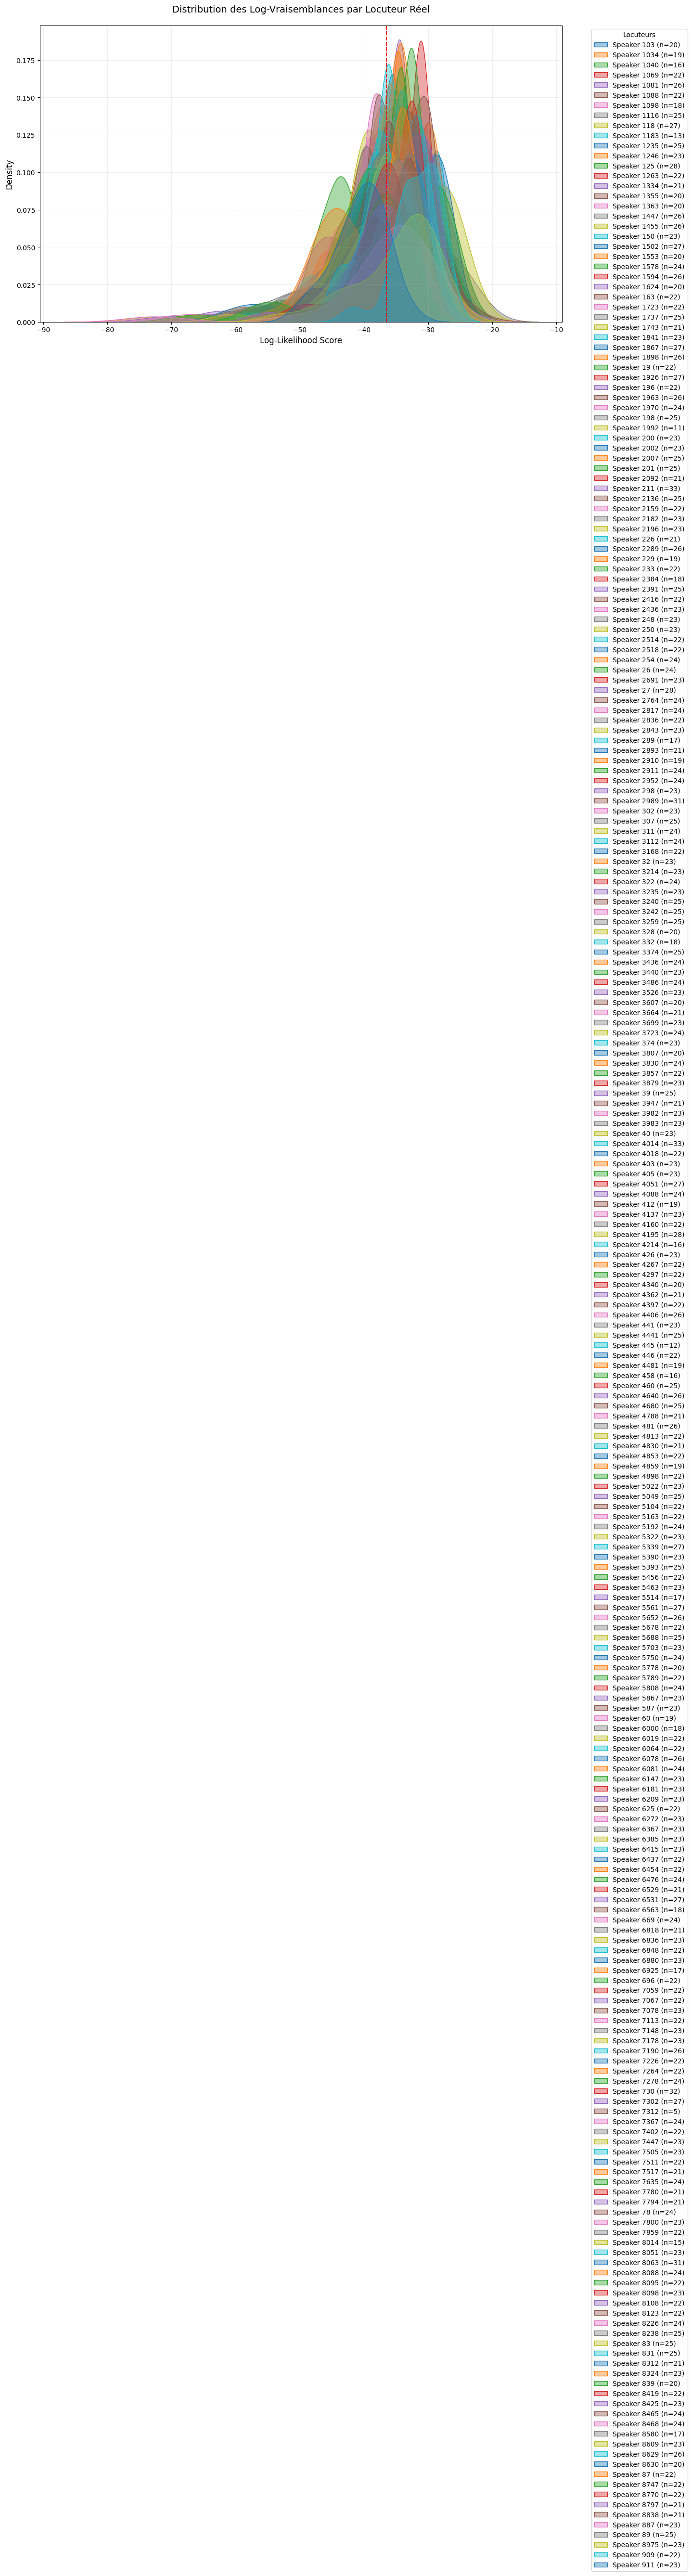

In [ ]:
log_likelihoods, predictions = plot_speaker_likelihoods(gmm_models_MFCC, X_test, y_test)